# Getting Started with ReproZip



In [1]:
!python -m pip install -U reprozip reprounzip graphviz

Requirement already up-to-date: reprozip in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.16)
Requirement already up-to-date: reprounzip in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.16)
Requirement already up-to-date: graphviz in /srv/conda/envs/notebook/lib/python3.7/site-packages (0.14.2)


First we set usage reporting, so the command output doesn't request it:

In [2]:
!reprozip usage_report --enable

Thank you, usage reports will be sent automatically from now on.


Then we change into the PDF folder, and trace the rendering of a PDF that has non-embedded fonts...

In [3]:
input_file = 'test_fontArialNotEmbedded.pdf'
#input_file = 'lorem-ipsum.pdf'

from pathlib import Path
input_file_prefix = Path(input_file).with_suffix('')

In [4]:
#%%bash
!rm -fr pdf/.reprozip-trace
# Use ReproZip to trace the process of converting a PDF to a series of page images:
!cd pdf && reprozip trace gs -sDEVICE=pngalpha -o {input_file_prefix}-%03d.png {input_file}

GPL Ghostscript 9.26 (2018-11-20)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1 through 56.
Page 1
Can't find (or can't open) font file /usr/share/ghostscript/9.26/Resource/Font/TimesNewRomanPSMT.
Can't find (or can't open) font file TimesNewRomanPSMT.
Can't find (or can't open) font file /usr/share/ghostscript/9.26/Resource/Font/TimesNewRomanPSMT.
Can't find (or can't open) font file TimesNewRomanPSMT.
Querying operating system for font files...
Can't find (or can't open) font file /usr/share/ghostscript/9.26/Resource/Font/TimesNewRomanPSMT.
Can't find (or can't open) font file TimesNewRomanPSMT.
Didn't find this font on the system!
Substituting font Times-Roman for TimesNewRomanPSMT.
Loading NimbusRoman-Regular font from /usr/share/ghostscript/9.26/Resource/Font/NimbusRoman-Regular... 4663028 3124705 6842480 5478474 4 done.
Can't find (or can't open) font file /usr/share/ghosts

In [5]:
# Remove any earlier effort:
!rm -f pdf/{input_file}.rpz
# Generate the package:
!cd pdf && reprozip pack {input_file}.rpz

In [6]:
# Remove any earlier effort:
!rm -f pdf/{input_file}.dot pdf/{input_file}.json
# Generate the dependency graph:
!reprounzip graph pdf/{input_file}.dot pdf/{input_file}.rpz
# And again, but in a simpler JSON format:
!reprounzip graph --json pdf/{input_file}.json pdf/{input_file}.rpz

In [7]:
!ls -lct pdf/{input_file}*

-rw-r--r-- 1 andy andy    44436 Nov  9 09:44 pdf/test_fontArialNotEmbedded.pdf.json
-rw-r--r-- 1 andy andy    42666 Nov  9 09:44 pdf/test_fontArialNotEmbedded.pdf.dot
-rw-r--r-- 1 andy andy 13588480 Nov  9 09:44 pdf/test_fontArialNotEmbedded.pdf.rpz
-rw-r--r-- 1 andy andy  1108452 Nov  3 22:01 pdf/test_fontArialNotEmbedded.pdf.strace
-rw-rw-rw- 1 andy andy   207305 Nov  2 19:16 pdf/test_fontArialNotEmbedded.pdf


/home/andy/pdf/test_fontArialNotEmbedded.pdf.dot.svg

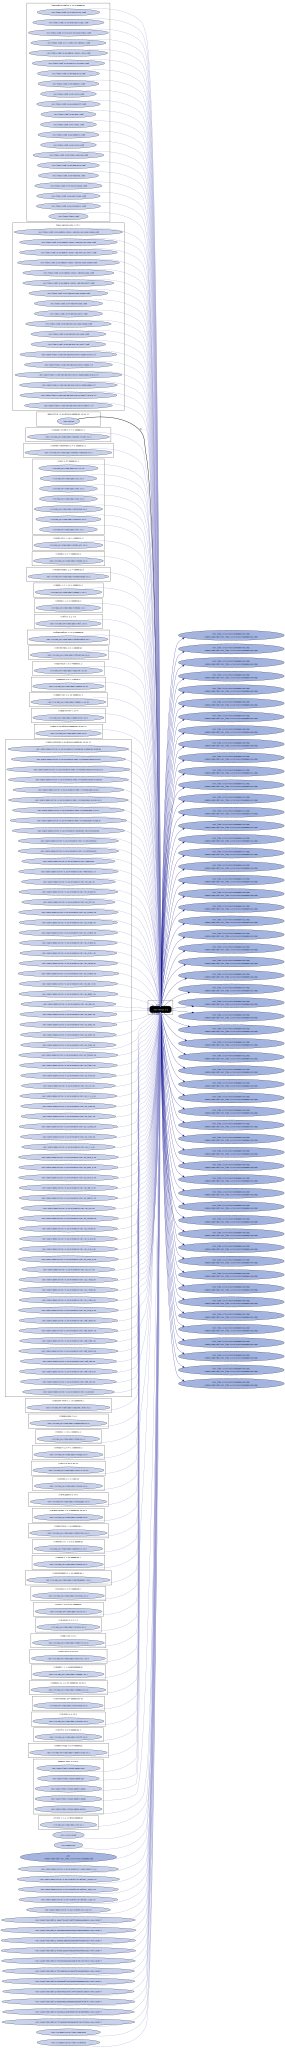

In [8]:
from graphviz import render
from IPython.display import SVG, HTML, FileLink, display

def show_dotfile(dot_file):
    render(engine='dot', filepath=dot_file, format='svg')

    # Give a link to download the SVG:
    svg_file = '%s.svg' % dot_file
    display(FileLink(svg_file))
    # Plot the SVG, but hack in a style to make it zoom out:
    style = "<style>.output_svg div {width:100% !important;height:100% !important;</style>"
    display(HTML(style))
    display(SVG(filename=svg_file))

# Render to SVG:
show_dotfile ('pdf/%s.dot' % input_file)


In [9]:
# Remove any earlier effort:
!rm -f pdf/{input_file}.packages.dot
# Generate the dependency graph but at package level (to make it easier to see what's going on):
!reprounzip graph --packages package pdf/{input_file}.packages.dot pdf/{input_file}.rpz

/home/andy/pdf/test_fontArialNotEmbedded.pdf.packages.dot.svg

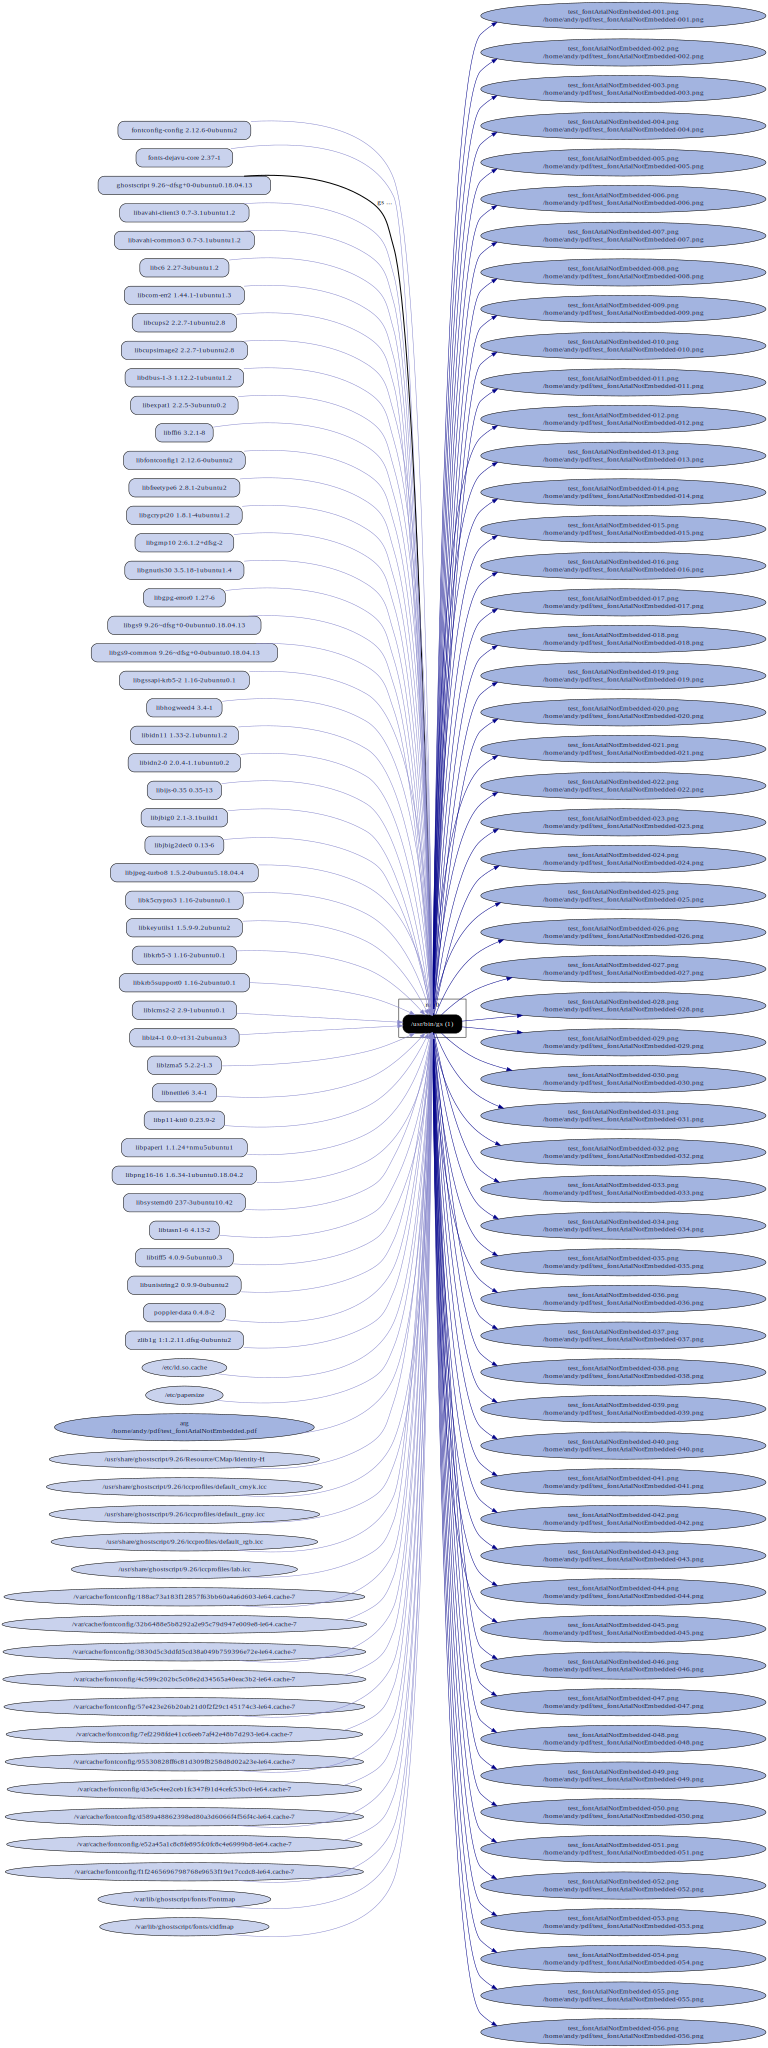

In [10]:
show_dotfile('pdf/%s.packages.dot' % input_file)